In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
import os
import keras
from keras_unet.models import custom_unet
from sklearn.model_selection import train_test_split

2023-03-28 23:46:07.237462: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcudart.so.11.0
/home/jiehyun.kim001/miniconda3/envs/O/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


-----------------------------------------
keras-unet init: TF version is >= 2.0.0 - using `tf.keras` instead of `Keras`
-----------------------------------------


In [3]:
import tensorflow as tf

In [4]:
gpu_avail = tf.test.is_gpu_available()

Instructions for updating:
Use `tf.config.list_physical_devices('GPU')` instead.


2023-03-28 23:46:11.787911: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-03-28 23:46:11.790572: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcuda.so.1
2023-03-28 23:46:12.046653: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1733] Found device 0 with properties: 
pciBusID: 0000:47:00.0 name: A100-SXM4-40GB computeCapability: 8.0
coreClock: 1.41GHz coreCount: 108 deviceMemorySize: 39.59GiB deviceMemoryBandwidth: 1.41TiB/s
2023-03-28 23:46:12.046692: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcudart.so.11.0
2023-03-28 23:46:12.065423: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] 

In [5]:
gpu_avail

True

In [6]:
DATAPATH = '/raid/mpsych/CACTAS/DATA/ESUS/'
images_file = os.path.join(DATAPATH, 'images.npy')
labels_file = os.path.join(DATAPATH, 'labels.npy')

In [7]:
images = np.load(images_file)
labels = np.load(labels_file)

In [8]:
images.ndim, labels.ndim

(3, 3)

In [9]:
# full dataset does not have the last channel
images = images.reshape(images.shape[0],images.shape[1],images.shape[2],1)
labels = labels.reshape(labels.shape[0],labels.shape[1],labels.shape[2],1)

In [10]:
p = np.random.permutation(len(images))

In [11]:
images = images[p]
labels = labels[p]

In [12]:
images = images.astype(np.float64)
labels = labels.astype(np.float64)

In [13]:
for i in range(images.shape[0]):
    
    images[i] = (images[i] - images[i].min()) / (images[i].max() - images[i].min()) # normalize individually
    

In [14]:
images.shape

(766, 512, 512, 1)

In [15]:
labels.shape

(766, 512, 512, 1)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


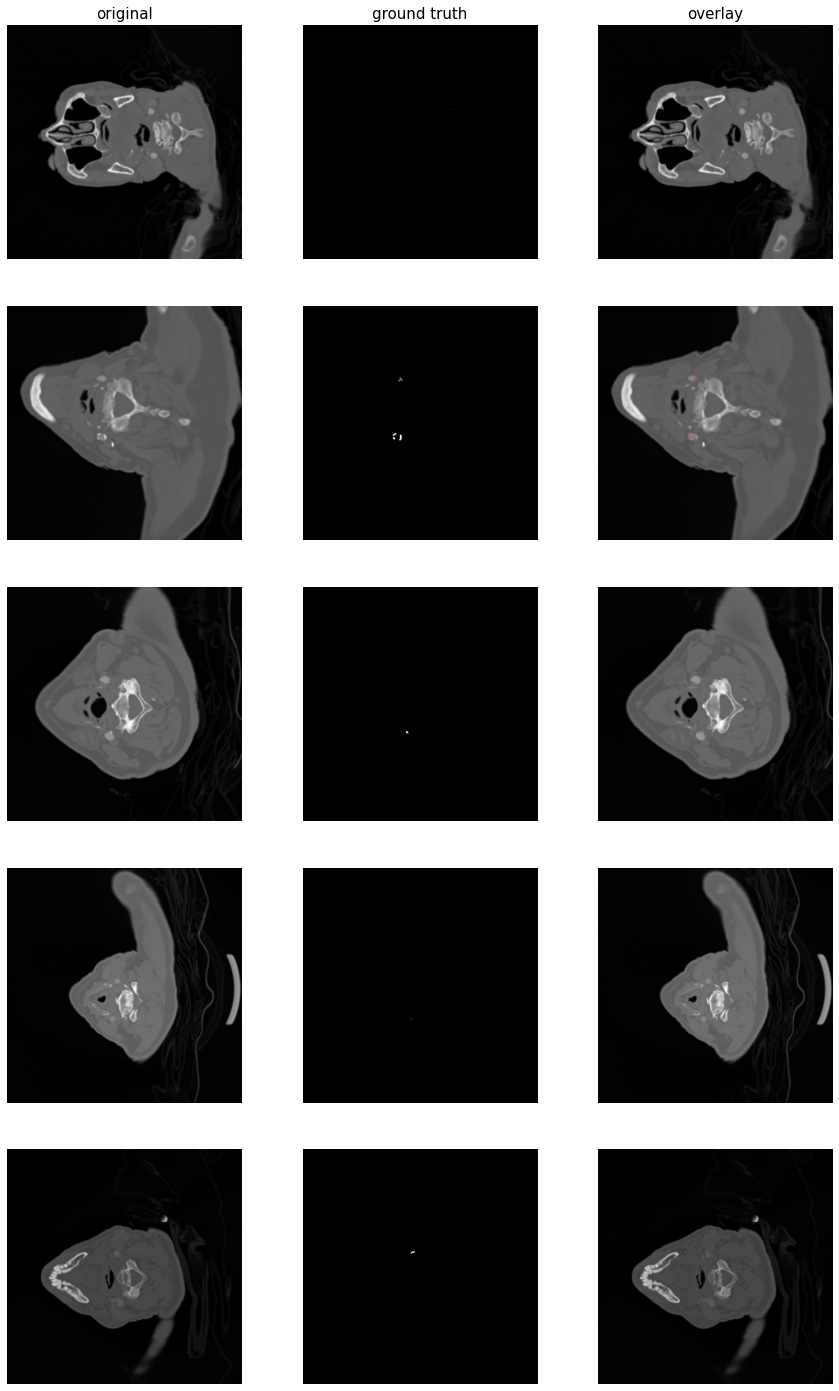

In [19]:
from keras_unet.utils import plot_imgs

plot_imgs(org_imgs=images, mask_imgs=labels, nm_img_to_plot=5, figsize=5)

In [17]:
#X_train, X_val, y_train, y_val = train_test_split(images, labels, test_size=0.2, random_state=0)

In [20]:
import json

In [21]:
with open("image_data_v3.json", "r") as fp:
    image_data = json.load(fp)
with open("label_data_v3.json", "r") as fp:
    label_data = json.load(fp)

In [22]:
image_data['82'], label_data['82']

(596, 596)

In [23]:
X_train = images[0:image_data['82']]
y_train = labels[0:label_data['82']]
X_val = images[image_data['82']:]
y_val = labels[label_data['82']:]

In [24]:
from keras_unet_collection import models, losses
import torch

model = models.swin_unet_2d((512, 512, 1), filter_num_begin=64,
                               n_labels=1, depth=4, stack_num_down=4, stack_num_up=4,
                               patch_size=(4, 4), num_heads=[4, 8, 16, 16],
                               window_size=[4, 2, 2, 2], num_mlp=512, 
                               output_activation='Sigmoid', shift_window=True, name='swin_unet')

#Softmax

2023-03-28 21:23:45.847248: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1733] Found device 0 with properties: 
pciBusID: 0000:bd:00.0 name: A100-SXM4-40GB computeCapability: 8.0
coreClock: 1.41GHz coreCount: 108 deviceMemorySize: 39.59GiB deviceMemoryBandwidth: 1.41TiB/s
2023-03-28 21:23:45.852308: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1871] Adding visible gpu devices: 0
2023-03-28 21:23:45.855232: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1733] Found device 0 with properties: 
pciBusID: 0000:bd:00.0 name: A100-SXM4-40GB computeCapability: 8.0
coreClock: 1.41GHz coreCount: 108 deviceMemorySize: 39.59GiB deviceMemoryBandwidth: 1.41TiB/s
2023-03-28 21:23:45.860240: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1871] Adding visible gpu devices: 0
2023-03-28 21:23:45.860276: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1258] Device interconnect StreamExecutor with strength 1 edge matrix:
2023-03-28 21:23:45.860281: I tensorflow/core/common_runtime/gp

Instructions for updating:
The `validate_indices` argument has no effect. Indices are always validated on CPU and never validated on GPU.


In [25]:
model.summary()

Model: "swin_unet_model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 512, 512, 1) 0                                            
__________________________________________________________________________________________________
patch_extract (patch_extract)   (None, 16384, 16)    0           input_1[0][0]                    
__________________________________________________________________________________________________
patch_embedding (patch_embeddin (None, 16384, 64)    1049664     patch_extract[0][0]              
__________________________________________________________________________________________________
swin_transformer_block (SwinTra (None, 16384, 64)    83460       patch_embedding[0][0]            
____________________________________________________________________________________

In [26]:
from tensorflow.keras import optimizers
from keras_unet.metrics import iou, iou_thresholded, dice_coef
from keras_unet_collection import losses

In [27]:
model.compile(loss='binary_crossentropy',
              optimizer=optimizers.Adam(lr = 0.001),
              metrics=[iou, iou_thresholded])

/home/jiehyun.kim001/miniconda3/envs/O/lib/python3.9/site-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:374: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


In [28]:
history = model.fit(X_train, 
                    y_train, 
                    batch_size=16,
                    epochs=100,
                    validation_data=(X_val, y_val))

2023-03-28 21:23:54.501531: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:176] None of the MLIR Optimization Passes are enabled (registered 2)
2023-03-28 21:23:54.521166: I tensorflow/core/platform/profile_utils/cpu_utils.cc:114] CPU Frequency: 2245645000 Hz


Epoch 1/100


2023-03-28 21:24:19.041949: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcublas.so.11
2023-03-28 21:24:20.499795: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcublasLt.so.11
2023-03-28 21:24:20.500137: I tensorflow/stream_executor/cuda/cuda_blas.cc:1838] TensorFloat-32 will be used for the matrix multiplication. This will only be logged once.
2023-03-28 21:24:20.652378: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcudnn.so.8
2023-03-28 21:24:21.991686: I tensorflow/stream_executor/cuda/cuda_dnn.cc:359] Loaded cuDNN version 8201
2023-03-28 21:24:23.581256: W tensorflow/stream_executor/gpu/asm_compiler.cc:191] Falling back to the CUDA driver for PTX compilation; ptxas does not support CC 8.0
2023-03-28 21:24:23.581278: W tensorflow/stream_executor/gpu/asm_compiler.cc:194] Used ptxas at ptxas
2023-03-28 21:24:23.58211

38/38 [==============================] - 66s 936ms/step - loss: 0.0537 - iou: 6.5608e-04 - iou_thresholded: 7.7110e-04 - val_loss: 0.0131 - val_iou: 0.0014 - val_iou_thresholded: 0.0016
Epoch 2/100
38/38 [==============================] - 30s 800ms/step - loss: 0.0072 - iou: 0.0015 - iou_thresholded: 9.2247e-04 - val_loss: 0.0045 - val_iou: 0.0053 - val_iou_thresholded: 0.0013
Epoch 3/100
38/38 [==============================] - 30s 794ms/step - loss: 0.0037 - iou: 0.0040 - iou_thresholded: 0.0017 - val_loss: 0.0030 - val_iou: 0.0081 - val_iou_thresholded: 0.0016
Epoch 4/100
38/38 [==============================] - 30s 801ms/step - loss: 0.0031 - iou: 0.0073 - iou_thresholded: 0.0027 - val_loss: 0.0030 - val_iou: 0.0056 - val_iou_thresholded: 6.4793e-04
Epoch 5/100
38/38 [==============================] - 30s 796ms/step - loss: 0.0027 - iou: 0.0154 - iou_thresholded: 0.0070 - val_loss: 0.0024 - val_iou: 0.0338 - val_iou_thresholded: 0.0170
Epoch 6/100
38/38 [===========================

Epoch 86/100
38/38 [==============================] - 30s 798ms/step - loss: 0.0113 - iou: 0.0177 - iou_thresholded: 0.0178 - val_loss: 0.0126 - val_iou: 0.0148 - val_iou_thresholded: 0.0149
Epoch 87/100
38/38 [==============================] - 30s 803ms/step - loss: 0.0111 - iou: 0.0163 - iou_thresholded: 0.0158 - val_loss: 0.0121 - val_iou: 0.0178 - val_iou_thresholded: 0.0186
Epoch 88/100
38/38 [==============================] - 30s 795ms/step - loss: 0.0107 - iou: 0.0180 - iou_thresholded: 0.0182 - val_loss: 0.0130 - val_iou: 0.0102 - val_iou_thresholded: 0.0088
Epoch 89/100
38/38 [==============================] - 30s 801ms/step - loss: 0.0104 - iou: 0.0188 - iou_thresholded: 0.0202 - val_loss: 0.0122 - val_iou: 0.0137 - val_iou_thresholded: 0.0128
Epoch 90/100
38/38 [==============================] - 30s 796ms/step - loss: 0.0104 - iou: 0.0179 - iou_thresholded: 0.0183 - val_loss: 0.0113 - val_iou: 0.0149 - val_iou_thresholded: 0.0158
Epoch 91/100
38/38 [=========================

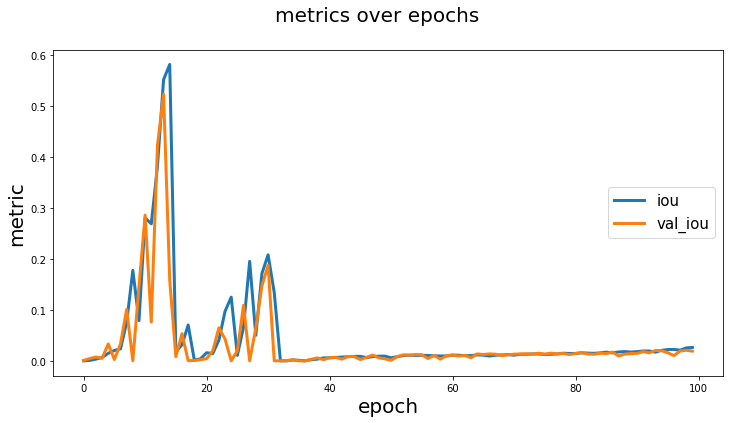

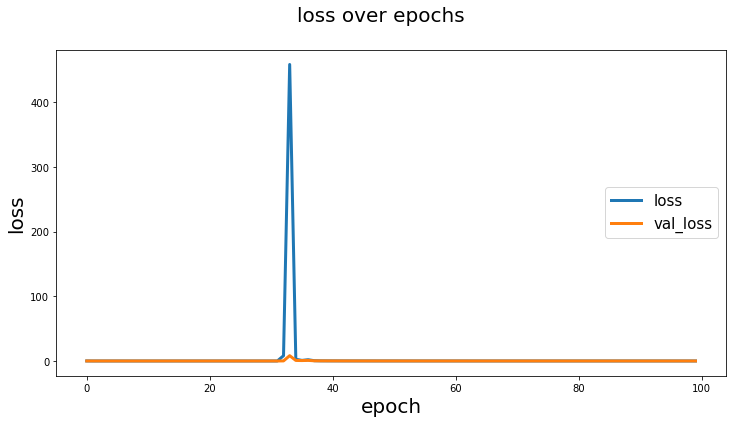

In [29]:
from keras_unet.utils import plot_segm_history

plot_segm_history(history)

In [30]:
y_pred = model.predict(X_val)

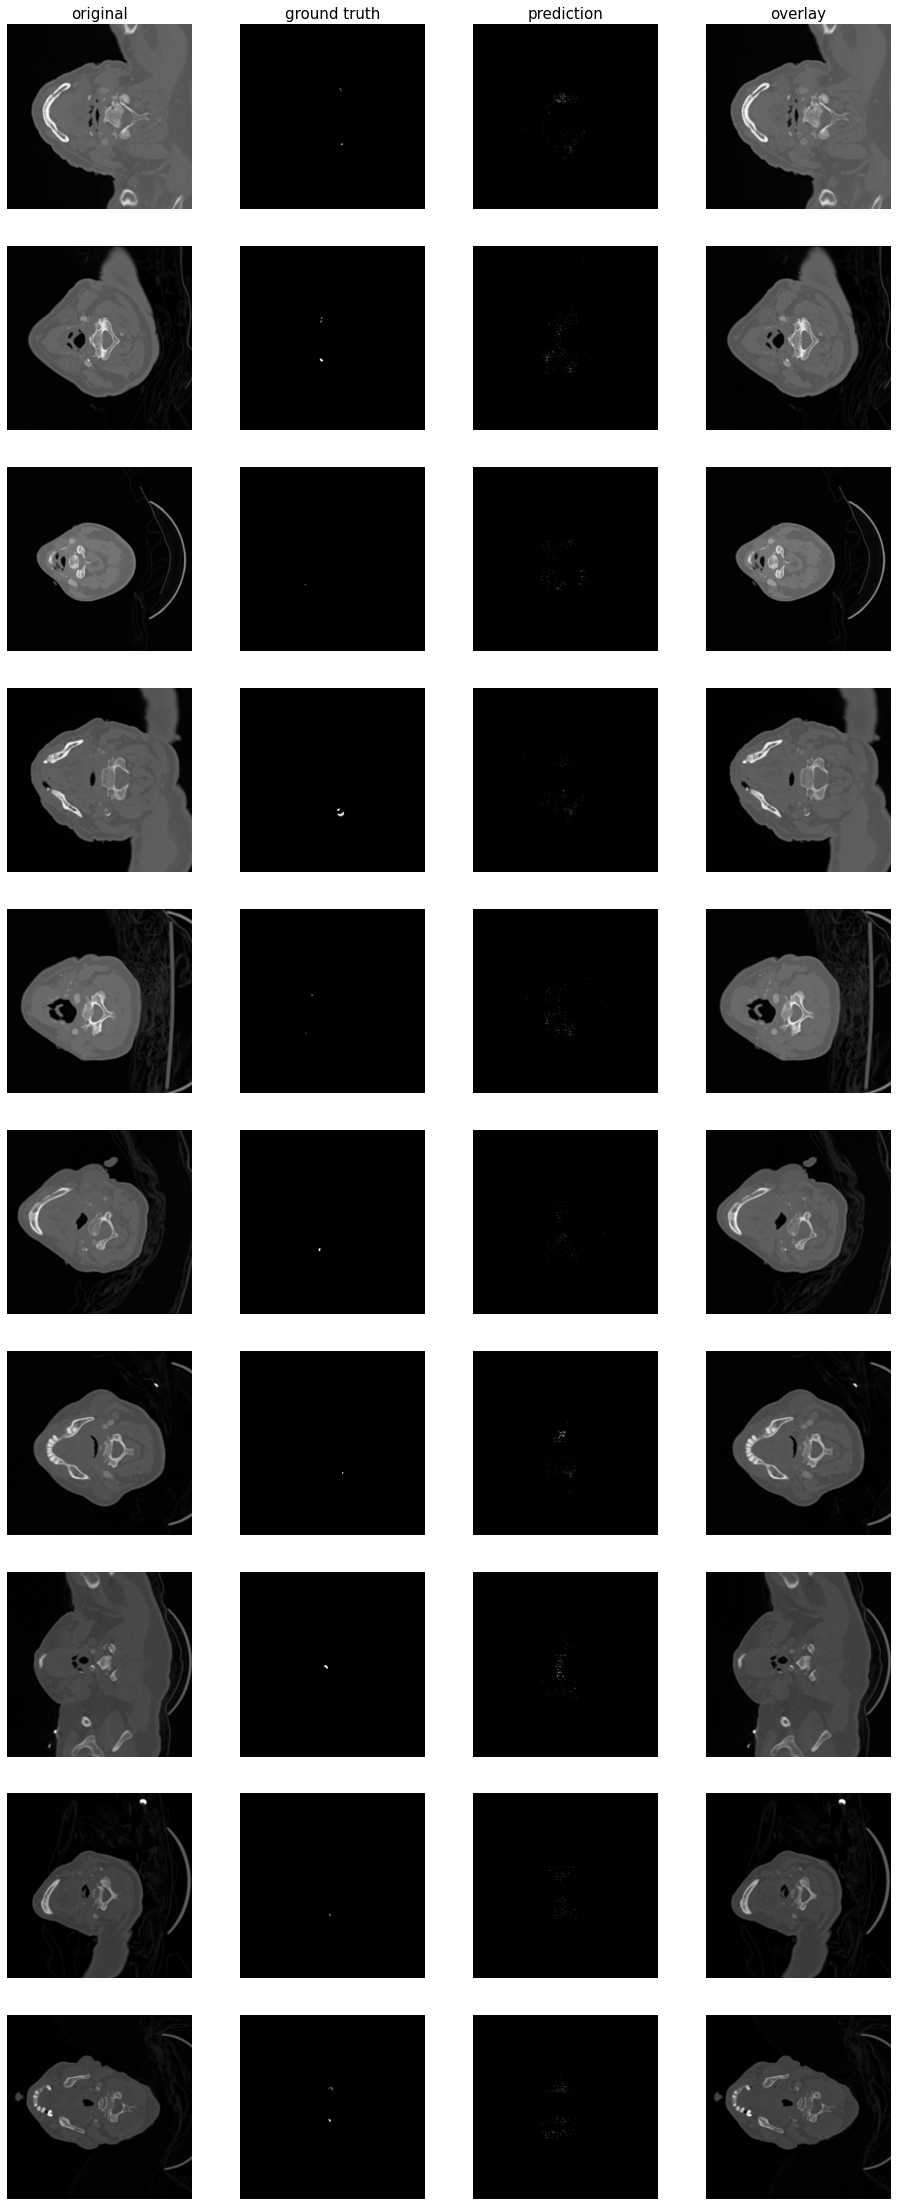

In [31]:
from keras_unet.utils import plot_imgs

plot_imgs(org_imgs=X_val, mask_imgs=y_val, pred_imgs=y_pred, nm_img_to_plot=10)

In [32]:
loss, iou, iou_thresholded = model.evaluate(X_val, y_val)

6/6 [==============================] - 2s 382ms/step - loss: 0.0087 - iou: 0.0193 - iou_thresholded: 0.0195
